# Walmart Data Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as px
import plotly.express as px
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')
import datetime as dt


In [2]:
df=pd.read_csv("Walmart Data Analysis and Forcasting.csv")

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
print("There are",df.shape[0],"rows and",df.shape[1],"Columns in the dataset")

There are 6435 rows and 8 Columns in the dataset


In [5]:
df.info() #to check info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
df['Date']=pd.to_datetime(df['Date']) # changing Date data type to date.

In [8]:
df = df.assign(Day = df.Date.dt.day,  # Extract day from the 'Date' column
               Month = df.Date.dt.month, # Extract month from the 'Date' column
               Year = df.Date.dt.year)  # Extract year from the 'Date' column


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Day           6435 non-null   int64         
 9   Month         6435 non-null   int64         
 10  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [10]:
df.isnull().sum() # to check null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Day             0
Month           0
Year            0
dtype: int64

In [11]:
df[df.duplicated()] # to check duplicates values

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year


In [12]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
Day               31
Month             12
Year               3
dtype: int64

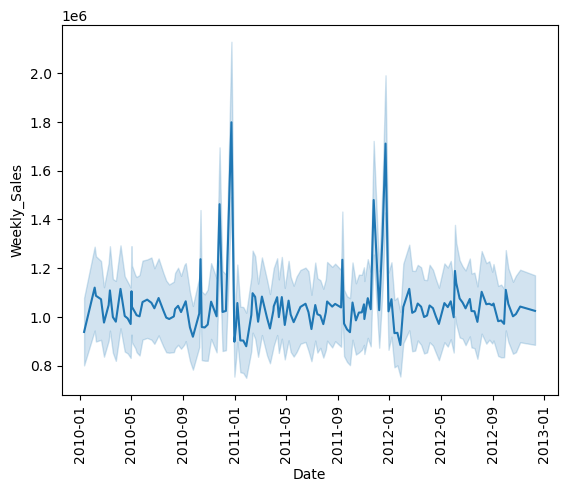

In [13]:
sns.lineplot(x='Date',y='Weekly_Sales',data=df)
plt.xticks(rotation=90)
plt.show()


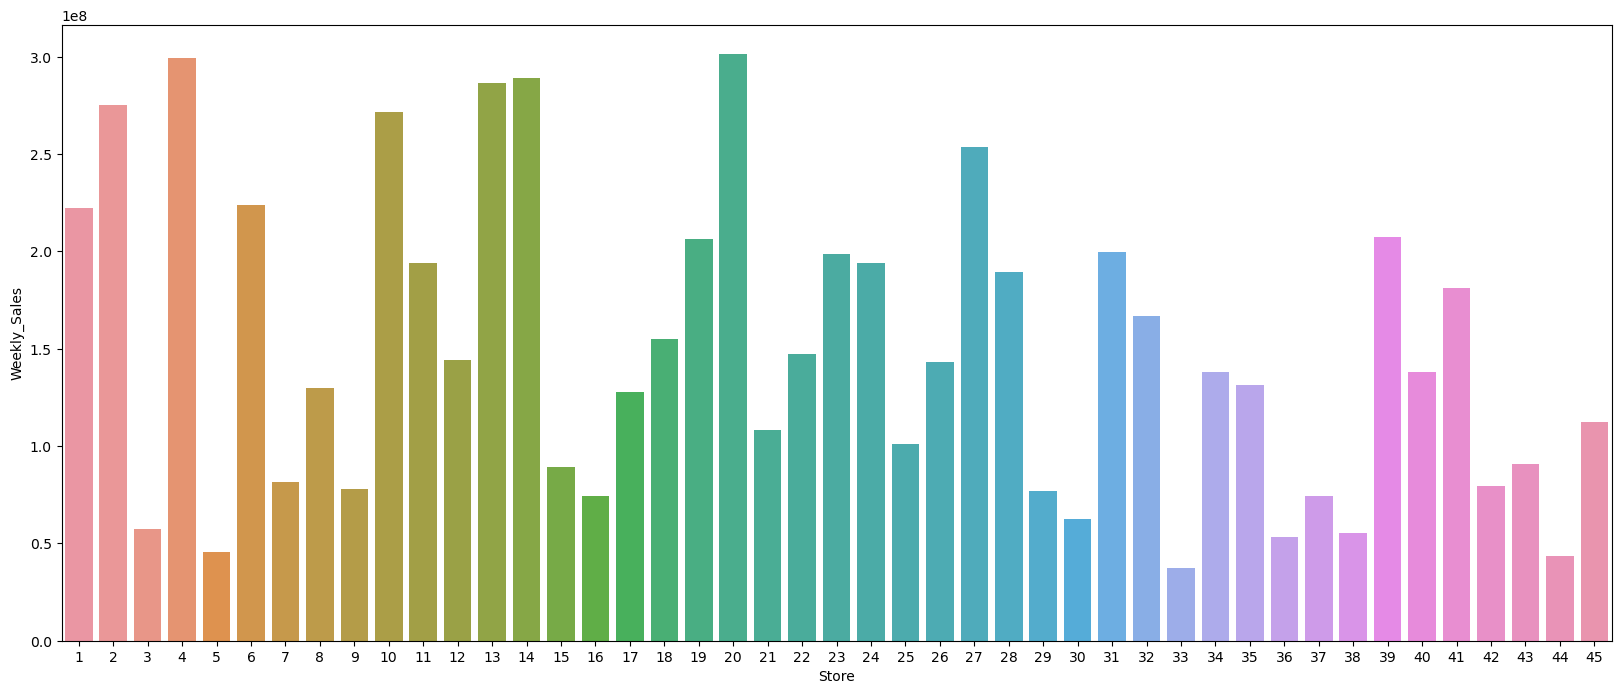

In [14]:
fig = plt.figure(figsize=(20,8))
sales_by_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
sns.barplot(x='Store', y='Weekly_Sales', data=sales_by_store)
plt.show()

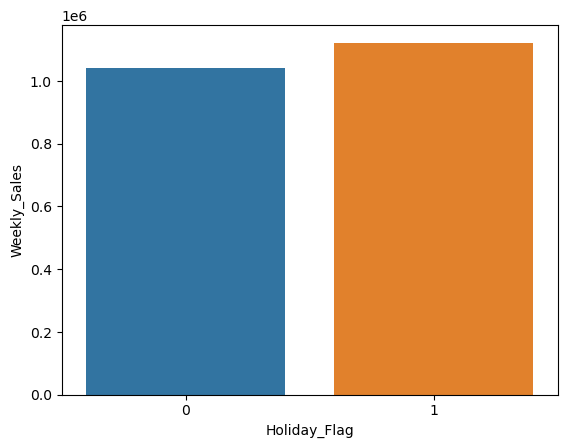

In [15]:
sales_by_holiday = df.groupby('Holiday_Flag')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=sales_by_holiday)
plt.show()

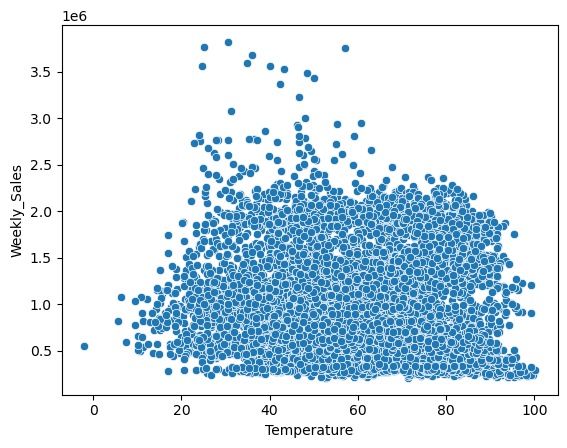

In [16]:
sns.scatterplot(x='Temperature', y='Weekly_Sales', data=df)
plt.show()


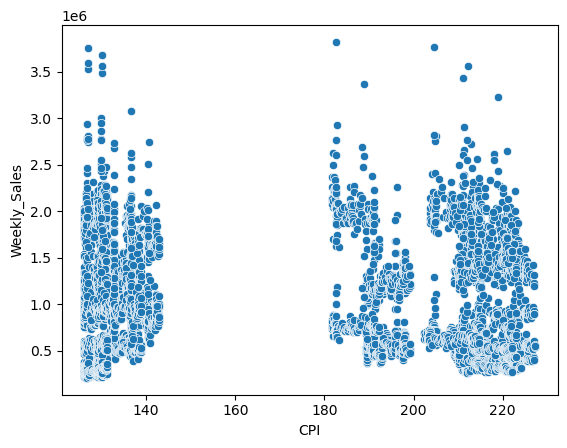

In [17]:
sns.scatterplot(x='CPI', y='Weekly_Sales', data=df)
plt.show()

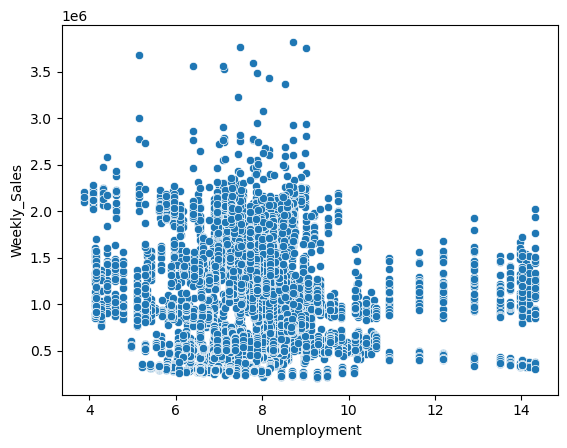

In [18]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df)
plt.show()


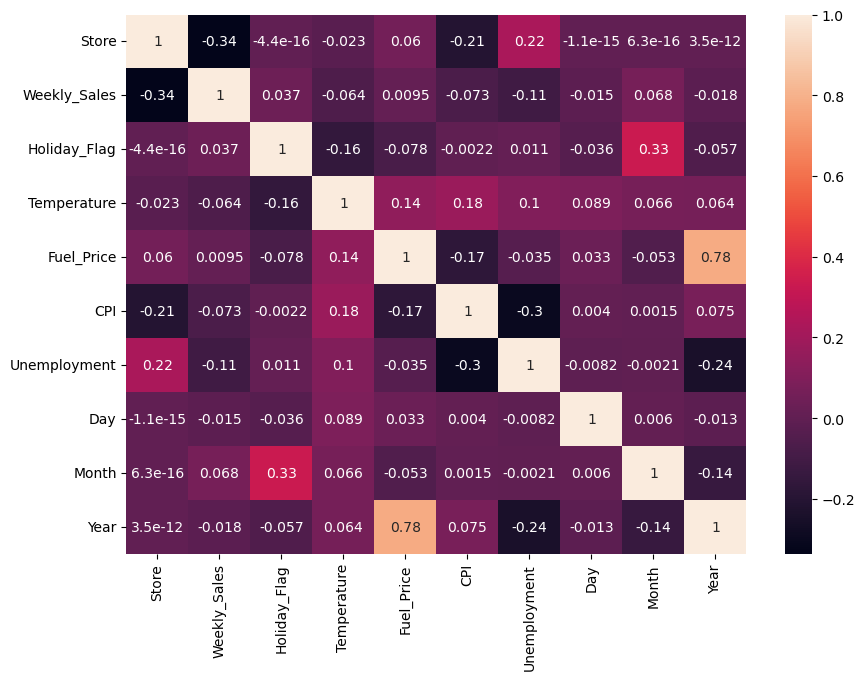

In [19]:
fig = plt.figure(figsize=(10,7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()